# Simple Bipartite Network

*Graph and Network Analysis*

Mael Illien, Jeremy O'Brien, Vanita Thompson

### Introduction

The [Davis Southern Club Women](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis) is a dataset that shows a simple 2-node (bipartite) network:  the attendance of 18 Southern Women at 14 social events.

DATASET: [DAVIS](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/davis.dat)

DESCRIPTION: One 18×14 matrix, binary.

BACKGROUND: These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

In this project, we seek to make inferences about the relationships between the women, and between the social events. 

## Setup

In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from scipy import stats
from pylab import rcParams
import math
from IPython.display import display, HTML
%matplotlib inline

## Data Import and Exploration

The Davis Southern Club Women data set was collected by Davis et al. This data set is also included with the NetworkX package and comes as a bipartite graph (clubs, women) with event attendance data.

In [2]:
#loading data from the networkx package
G = nx.davis_southern_women_graph()

Previewing some details, starting with nodes and edges.

In [18]:
G.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

There are 2 modes: women and events. The edges represent women's attendance to a given event.

In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


There are 32 total nodes.  As this is a 2-mode network, these nodes represent both the number of women plus the number of events.

There are 89 total edges.  These edges represent the total number of attendees at each event. 

The average degree of the 2-mode network is 5.5625, which is a mix of average events attended by women and average number of women at events.

### Visualization

We visualize the 2-mode network using a colored nodelist to distinguish between women and events.

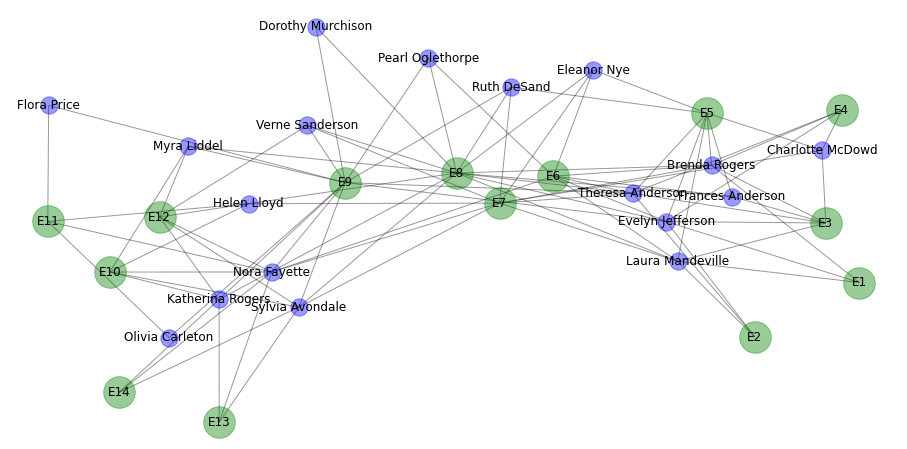

In [5]:
women, events = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='blue', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='green', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

Charting the fourteen events and eighteen women reveals some contours of the graph.  

No event was attended by all women; events E7, E8, and E9 had the most participants.  

Of the women, Evelynn Jefferson, Theresa Anderson, and Nora Fayette attended the most events.  We'll subtantiate this with distance measures below.

There appear to be at least two distinct cliques, each with four events attended almost only by those cliques. Additionally, there are a handful of events attended by women from both cliques, and there are women who do not appear to belong to either of these cliques.  If a woman attended an event with another, we could simply regard them as 'friends'.

In [6]:
print('center =', nx.center(G))
print('diameter =', nx.diameter(G))
print('radius =', nx.radius(G))

center = ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']
diameter = 4
radius = 3


In [7]:
# Extract DegreeView of just the top nodes (women)
G_top_nodes, G_bottom_nodes = bipartite.sets(G)
display(HTML(pd.DataFrame(G.degree(G_top_nodes), columns=["Woman", "Degree"]).sort_values(by=["Degree"], ascending=False).to_html(index=False)))

Woman,Degree
Evelyn Jefferson,8
Theresa Anderson,8
Nora Fayette,8
Sylvia Avondale,7
Laura Mandeville,7
Brenda Rogers,7
Katherina Rogers,6
Helen Lloyd,5
Frances Anderson,4
Myra Liddel,4


In the above analysis, degree represents the number of events a woman attended.   

## Data Analysis - Unipartite Representation

### Women Network

We use the unipartite representation to transform a 2-node network into a 1-node network, where edges are weighted by the number of events women attended in common.  Those who attend events together we can simply regard as "Friends."

In [8]:
# Project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
# Summary statics for women-only node network
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


With these edge weights, we can analyze the women nodes on the basis of their friend counts. Friendship is assumed if two women attended events in common.

In [9]:
print("#Friends, Member")
for w in sorted([(W.degree(w),w) for w in women], reverse=True):
    print('%d %s' % (w))

#Friends, Member
17 Verne Sanderson
17 Theresa Anderson
17 Sylvia Avondale
17 Ruth DeSand
17 Nora Fayette
17 Helen Lloyd
17 Evelyn Jefferson
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Frances Anderson
15 Eleanor Nye
15 Brenda Rogers
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd


Evelynn Jefferson, Theresa Anderson, and Nora Fayette are again at the top of the list in terms of "friends," with 17 each. Charlotte McDowd had the least with 11.

To analyze this further, we can visualize not only how many connections each woman node has, but with which other nodes those connections are found with the help of a unipartite representation. 

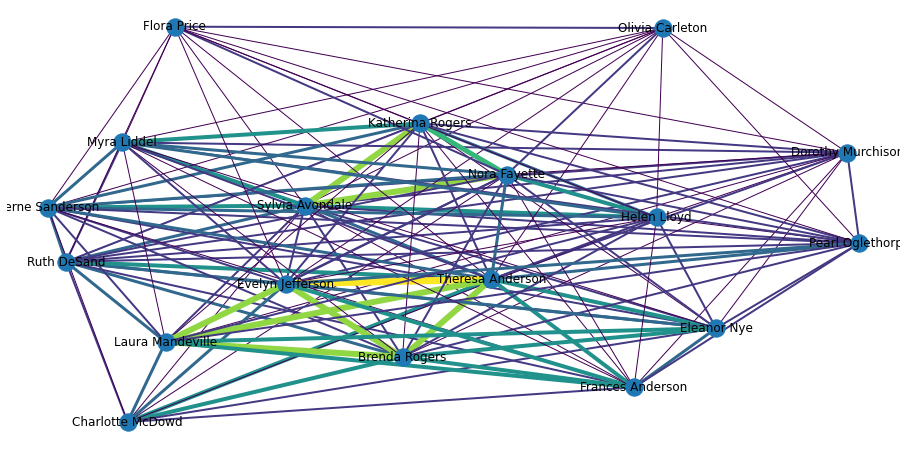

In [10]:
# Visualize the unipartite graph to identify relationships between women.
W = bipartite.weighted_projected_graph(G, women,ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(W, k=0.1,iterations=20, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

From the graph above, it appears that there are two groups of women with particularly strong relationships: 
- Theresa Anderson, Brenda Rogers, Laura Mandeville and Evelyn Jefferson
- Nora Fayette, Sylvia Avondale and Katherina Rogers

In fact, these women form cliques as shown below.

In [11]:
# A function to trim weak connections from the graph
def trim_edges(g, weight=1): 
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            g2.add_edge(f,to,**edata)
    return g2

The returned cliques below correspond to the what was identified visually in the graph above.

In [12]:
trimmed = trim_edges(W,4)
cliques = list(nx.find_cliques(trimmed))
for i in range(len(cliques)):
    print('Clique', i+1, ':', cliques[i-1])

Clique 1 : ['Brenda Rogers', 'Laura Mandeville', 'Evelyn Jefferson', 'Theresa Anderson']
Clique 2 : ['Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette']


### Social Events Network

We repeat the steps to isolate the unipartite events network.

In [13]:
E = bipartite.weighted_projected_graph(G, events,ratio=False)
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


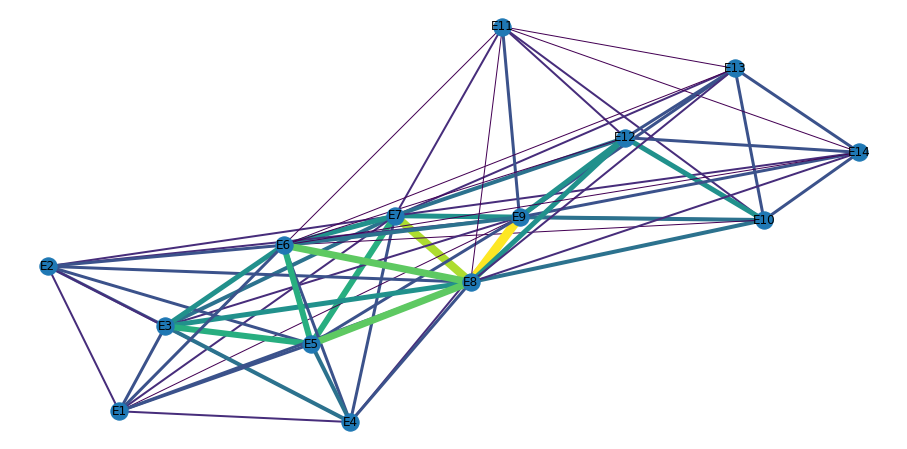

In [20]:
weights = [edata['weight'] for f,t,edata in E.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(E, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

The plot above reveals the strongest connections between events. The strength of the connection represents the the number of events women attended in common. The strongest connection is between events E8 and E9, but there are a number of others including connections between events E9, E8, E7, E5, E3 as indicated by the thickness and colors of the connections seen above. 

Looking at the degree of these events below, it is not surprising to find E9 and E8 at the top since these events gathered a lot of women, and in particular, the same women. It is interesting to compare E10 to E5 since they both have the same degree, but unlike E5, E10 gathered women who do not attend many events together.

In [16]:
# Degree centrality (number of women attend the events)
d_E = E.degree(E)
display(HTML(pd.DataFrame(d_E, columns=["Social Events", "Degree"]).sort_values(by=["Degree"], ascending=False).to_html(index=False)))

Social Events,Degree
E7,13
E9,13
E8,13
E6,13
E10,8
E2,8
E3,8
E11,8
E12,8
E13,8


## Conclusion

In this project we explored how to breakdown 2-node networks into projected networks via unipartite representations. By examining these affiliation networks, we were able to extract co-membership information which allowed us to reveal information beyond the typical centrality measures such as cliques of women who often attend the same events. By projecting the events network, we were also able to identify which events were co-attended by the same women. 